In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as skl
import xgboost as xgb
import catboost
import numpy 

# Step 1: Load and Understand the Data

In [2]:
dataset = pd.read_csv("/home/happy/gssoc/AgriTech/Crop Yield Prediction/Datasets/crop_yield.csv")

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [4]:
dataset.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [5]:
dataset.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
dataset.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


# Step 2: Encode Categorical Features

In [8]:
# Example: Encoding categorical columns if any exist
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Apply Label Encoding (or One-Hot Encoding)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


In [9]:
for col, le in label_encoders.items():
    print(f"Column: {col}")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_label} --> {encoded_value}")
    print("-" * 30)


Column: Crop
  Arecanut --> 0
  Arhar/Tur --> 1
  Bajra --> 2
  Banana --> 3
  Barley --> 4
  Black pepper --> 5
  Cardamom --> 6
  Cashewnut --> 7
  Castor seed --> 8
  Coconut  --> 9
  Coriander --> 10
  Cotton(lint) --> 11
  Cowpea(Lobia) --> 12
  Dry chillies --> 13
  Garlic --> 14
  Ginger --> 15
  Gram --> 16
  Groundnut --> 17
  Guar seed --> 18
  Horse-gram --> 19
  Jowar --> 20
  Jute --> 21
  Khesari --> 22
  Linseed --> 23
  Maize --> 24
  Masoor --> 25
  Mesta --> 26
  Moong(Green Gram) --> 27
  Moth --> 28
  Niger seed --> 29
  Oilseeds total --> 30
  Onion --> 31
  Other  Rabi pulses --> 32
  Other Cereals --> 33
  Other Kharif pulses --> 34
  Other Summer Pulses --> 35
  Peas & beans (Pulses) --> 36
  Potato --> 37
  Ragi --> 38
  Rapeseed &Mustard --> 39
  Rice --> 40
  Safflower --> 41
  Sannhamp --> 42
  Sesamum --> 43
  Small millets --> 44
  Soyabean --> 45
  Sugarcane --> 46
  Sunflower --> 47
  Sweet potato --> 48
  Tapioca --> 49
  Tobacco --> 50
  Turmeric --> 5

In [10]:
dataset.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


# Step 3: Feature and Target Separation

In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB
None


In [12]:
X = dataset.iloc[:, :9]
Y = dataset["Yield"]
Y = pd.DataFrame(Y)

# Step 4: Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# added scaled data to a dataframe
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# Step 5: Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 42, test_size = 0.2)

# Step 6: Visualize Feature Correlations

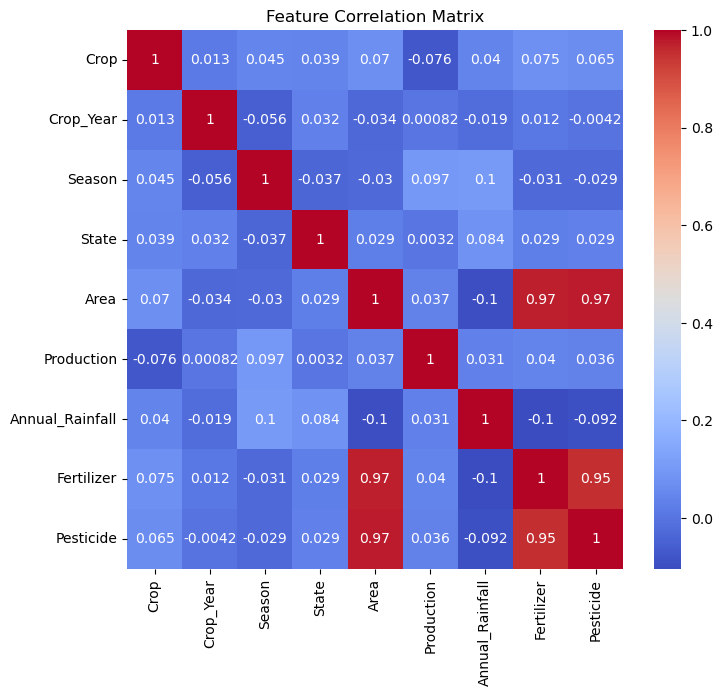

In [15]:
# Only for numerical features
#performing Pearson correlation test on only x_train data to avoid data leakage and fair practice
plt.figure(figsize=(8, 7))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [16]:
#removing one of the highly correleted feature columns to avoid risk of duplicate input
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i, j] > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [17]:
corr_features = correlation(x_train, 0.8)
print(corr_features)

{'Fertilizer', 'Pesticide'}


In [18]:
#check correlation with target variable
corr_target = x_train.corrwith(y_train)
#both fertilizer and pesticide have very low correlation with target variable , almost to the level of noise.
#Hence, dropping both the feature columns
x_train.drop(["Pesticide","Fertilizer"],axis=1,inplace=True)
x_test.drop(["Pesticide","Fertilizer"],axis=1,inplace=True)

# Apply StandardScaler

In [15]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data to avoid data leakage
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\n# Fit only on training data to avoid data leakage\nX_train_scaled = scaler.fit_transform(x_train)\nX_test_scaled = scaler.transform(x_test)\n'

# Support Vector Machine

In [16]:
'''from mlxtend.plotting import plot_decision_regions'''

'from mlxtend.plotting import plot_decision_regions'

In [17]:
'''from sklearn.svm import SVR

svr = SVR(kernel='rbf')  # You can tune C, epsilon later
svr.fit(X_train_scaled, y_train)

print("Training R² Score:", svr.score(X_train_scaled, y_train))
print("Testing R² Score:", svr.score(X_test_scaled, y_test))
'''

'from sklearn.svm import SVR\n\nsvr = SVR(kernel=\'rbf\')  # You can tune C, epsilon later\nsvr.fit(X_train_scaled, y_train)\n\nprint("Training R² Score:", svr.score(X_train_scaled, y_train))\nprint("Testing R² Score:", svr.score(X_test_scaled, y_test))\n'

Cross validation


In [18]:
'''from sklearn.model_selection import cross_val_score
p = cross_val_score(SVR(), X, Y, cv = 5)'''

'from sklearn.model_selection import cross_val_score\np = cross_val_score(SVR(), X, Y, cv = 5)'

In [19]:
'''p.sort()
p*100'''

'p.sort()\np*100'

Support Vector Machine can't be use as it is showing poor score

# Random Forest Regressor

In [20]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred = rf_model.predict(x_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
'''

'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Initialize and train model\nrf_model = RandomForestRegressor(n_estimators=100, random_state=42)\nrf_model.fit(x_train, y_train)\n\n# Predict\ny_pred = rf_model.predict(x_test)\n\n# Evaluate\nprint("R² Score:", r2_score(y_test, y_pred))\nprint("Mean Squared Error:", mean_squared_error(y_test, y_pred))\n'

Residuals vs Predicted

In [23]:
# residuals = y_test - y_pred


In [24]:
'''import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero error line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()
'''

'import matplotlib.pyplot as plt\n\nplt.figure(figsize=(8, 6))\nplt.scatter(y_pred, residuals, alpha=0.6)\nplt.axhline(y=0, color=\'red\', linestyle=\'--\')  # Zero error line\nplt.xlabel("Predicted Values")\nplt.ylabel("Residuals")\nplt.title("Residuals vs Predicted Values")\nplt.grid(True)\nplt.show()\n'

Improved accuracy from R2 score 0.93 to 0.94

#  XGBoost + CATBoost using Stacking

In [19]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
# Define and train the model
xgb = XGBRegressor(
    n_estimators=1600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
cat = CatBoostRegressor(iterations=1600, learning_rate=0.05, verbose=0, random_state=42)
meta = Ridge()

stacked_model = StackingRegressor(estimators=[('xgb', xgb), ('cat', cat)], final_estimator=meta,passthrough=True)

stacked_model.fit(x_train, y_train)
y_pred = stacked_model.predict(x_test)

# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")

/home/happy/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py:1060: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² Score: 0.9475673460086793
Root Mean Squared Error: 204.96617428440015


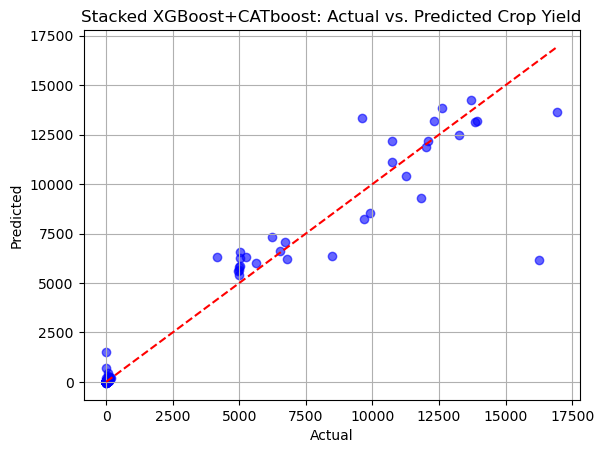

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#scatter plot actual vs predicted
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacked XGBoost+CATboost: Actual vs. Predicted Crop Yield')
plt.grid(True)
plt.show()


In [119]:
import joblib

# Save the trained Stacked model
joblib.dump(stacked_model,'xgb_crop_model.pkl')

# Save all encoders together in one file
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [ ]:
import joblib Autumn      --> 0
  Kharif      --> 1
  Rabi        --> 2
  Summer      --> 3
  Whole Year  --> 4
  Winter      --> 5
import os

# Ensure the save directory exists
os.makedirs('xgb', exist_ok=True)

# Save each encoder separately
for col, le in label_encoders.items():
    joblib.dump(le, f'xgb/{col}_encoder.pkl')


In [ ]:
# regenerate_encoders.py
import joblib
from sklearn.preprocessing import LabelEncoder

# Full list of categories used in index.html

crop_list = [ "Arecanut", "Arhar/Tur", "Bajra", "Banana", "Barley", "Black pepper", "Cardamom", "Cashewnut", 
              "Castor seed", "Coconut", "Coriander", "Cotton(lint)", "Cowpea(Lobia)", "Dry chillies", "Garlic",
              "Ginger", "Gram", "Groundnut", "Guar seed", "Horse-gram", "Jowar", "Jute", "Khesari", "Linseed",
              "Maize", "Masoor", "Mesta", "Moong(Green Gram)", "Moth", "Niger seed", "Oilseeds total", "Onion",
              "Other  Rabi pulses", "Other Cereals", "Other Kharif pulses", "Other Summer Pulses",
              "Peas & beans (Pulses)", "Potato", "Ragi", "Rapeseed &Mustard", "Rice", "Safflower", "Sannhamp",
              "Sesamum", "Small millets", "Soyabean", "Sugarcane", "Sunflower", "Sweet potato", "Tapioca",
              "Tobacco", "Turmeric", "Urad", "Wheat", "other oilseeds" ]

season_list = ["Autumn", "Kharif", "Rabi", "Summer", "Whole Year", "Winter"]

state_list = [ "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Delhi", "Goa", "Gujarat",
               "Haryana", "Himachal Pradesh", "Jammu and Kashmir", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh",
               "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Puducherry", "Punjab",
               "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal" ]

# Create LabelEncoders
crop_encoder = LabelEncoder()
season_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit encoders
crop_encoder.fit(crop_list)
season_encoder.fit(season_list)
state_encoder.fit(state_list)

# Save them to disk
joblib.dump(crop_encoder, r'D:\Pr\ojects\Crop Prediction\Crop Yield Prediction\crop_yield_app\models\Crop_encoder.pkl')
joblib.dump(season_encoder, r'D:\Projects\Crop Prediction\Crop Yield Prediction\crop_yield_app\models\Season_encoder.pkl')
joblib.dump(state_encoder, r'D:\Projects\Crop Prediction\Crop Yield Prediction\crop_yield_app\models\State_encoder.pkl')

print("✅ Encoders saved successfully.")


✅ Encoders saved successfully.


# LightGBM Regressor

In [ ]:
'''import lightgbm as lgb

from sklearn.metrics import root_mean_squared_error, r2_score

# Create and train the model
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=300,
    random_state=42
)

lgb_model.fit(x_train, y_train)

# Make predictions
y_pred = lgb_model.predict(x_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")
'''

'import lightgbm as lgb\n\nfrom sklearn.metrics import root_mean_squared_error, r2_score\n\n# Create and train the model\nlgb_model = lgb.LGBMRegressor(\n    objective=\'regression\',\n    boosting_type=\'gbdt\',\n    num_leaves=31,\n    learning_rate=0.05,\n    n_estimators=300,\n    random_state=42\n)\n\nlgb_model.fit(x_train, y_train)\n\n# Make predictions\ny_pred = lgb_model.predict(x_test)\n\n# Evaluate\nr2 = r2_score(y_test, y_pred)\nrmse = root_mean_squared_error(y_test, y_pred)\n\nprint(f"R² Score: {r2}")\nprint(f"Root Mean Squared Error: {rmse}")\n'